<a href="https://colab.research.google.com/github/Arshiya-Begum30/FMML_Poject_and_labs/blob/main/Probabilistic_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probabilistic ML models**

# 1. Convolutional Operations



# Exercises:

**1. Try padding in convolution on lotus.jpg and show results**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get the sample image
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   3623      0 --:--:-- --:--:-- --:--:-- 2749k


In [ ]:
def apply_filter(img, filter):
  height, width = img.shape
  filter_size = filter.shape

  output = np.empty(0)

  # Move the filter over entire image and store the result in output
  for i in range(0, height - filter_size[1] + 1):
    for j in range(0, width - filter_size[0] + 1):
      # Matrix multiplication for a single patch of image and filter
      output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))

  # Calculate the output shape of the resultant image
  output_shape = (height - (filter_size[1]-1)), (width - (filter_size[0]-1))

  # Return the reshaped image
  return output.reshape(output_shape)

In [ ]:
def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()

Original image size:  (99, 100)
Output image size:  (97, 98)


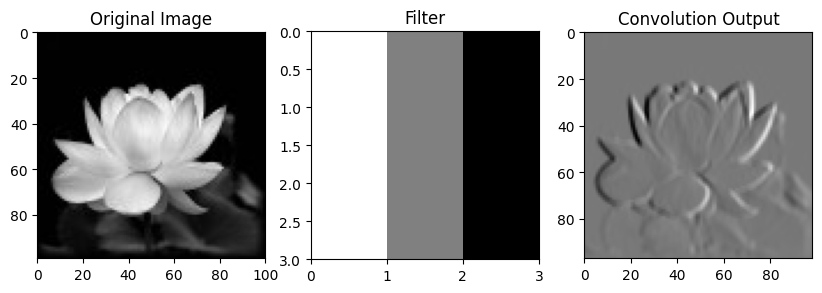

In [ ]:
# Read the image with opencv, 0 stands for 'grayscale'
image = cv2.imread('lotus.jpg', 0)
print('Original image size: ', image.shape)

# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')

# Apply this filter to image
output = apply_filter(image, filter)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output')

# Let's plot the images
plot_images(images, titles)

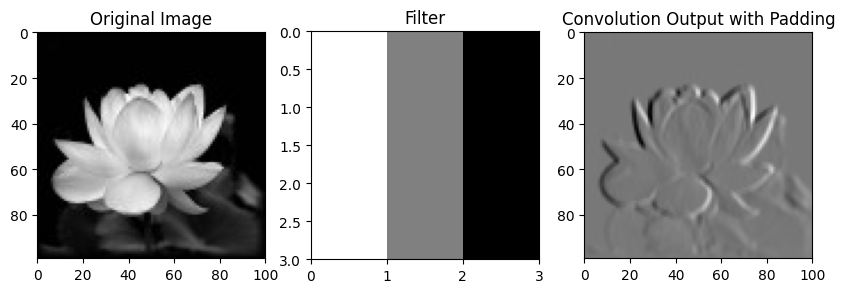

In [ ]:
def apply_filter_with_padding(img, filter, padding):
    height, width = img.shape
    filter_size = filter.shape

    # Add padding to the image
    img_padded = np.pad(img, pad_width=padding, mode='constant', constant_values=0)

    output = np.empty(0)

    # Move the filter over the padded image and store the result in output
    for i in range(0, height):
        for j in range(0, width):
            # Matrix multiplication for a single patch of image and filter
            output = np.append(output, np.sum(np.multiply(img_padded[i:i+filter_size[0], j:j+filter_size[1]], filter)))

    # Calculate the output shape of the resultant image
    output_shape = (height, width)

    # Return the reshaped image
    return output.reshape(output_shape)

# Apply filter with padding to lotus.jpg
padding_size = 2  # You can adjust the padding size
output_with_padding = apply_filter_with_padding(image, filter, padding_size)

# Plot the images
images_with_padding = [image, filter, output_with_padding]
titles_with_padding = ['Original Image', 'Filter', 'Convolution Output with Padding']
plot_images(images_with_padding, titles_with_padding)

**2. Try stride in convolution on lotus.jpg and show results**

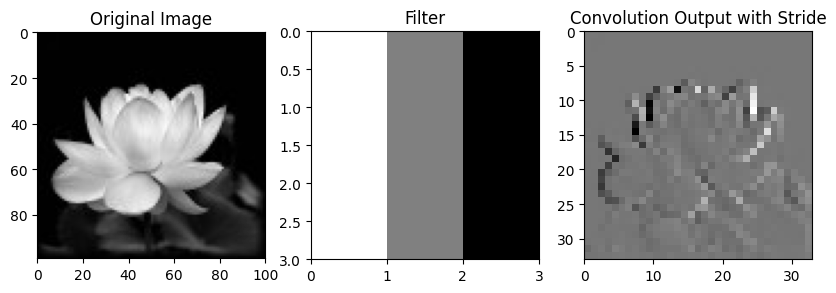

In [ ]:
def apply_filter_with_stride(img, filter, stride):
    height, width = img.shape
    filter_size = filter.shape

    output = np.empty(0)

    # Move the filter with specified stride over entire image and store the result in output
    for i in range(0, height - filter_size[1] + 1, stride):
        for j in range(0, width - filter_size[0] + 1, stride):
            # Matrix multiplication for a single patch of image and filter
            output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))

    # Calculate the output shape of the resultant image
    output_shape = ((height - filter_size[1]) // stride) + 1, ((width - filter_size[0]) // stride) + 1

    # Return the reshaped image
    return output.reshape(output_shape)

# Apply filter with stride to lotus.jpg
stride_size = 3  # You can adjust the stride size
output_with_stride = apply_filter_with_stride(image, filter, stride_size)

# Plot the images
images_with_stride = [image, filter, output_with_stride]
titles_with_stride = ['Original Image', 'Filter', 'Convolution Output with Stride']
plot_images(images_with_stride, titles_with_stride)

# 2. CNN and Using Learnt Representations


# Exercises:

**Q 1: What is the ratio of parameters in single 5 x 5 kernel and equivalent stacked 3 x 3 kernels? Consider number of channels in input and output channels as C.**

The number of parameters in a convolutional layer is determined by the size of the kernels and the number of input and output channels.

Parameters in nxn kernel=Kernel Size×Number of Input Channels×Number of Output Channels

So, for a 5x5 kernel:

Parameters in 5x5 kernel=5×5×C×C and there is one bias per output channel, so the number of biases is C.

Parameters in 3x3 kernel=3×3×C×C and there is one bias per output channel, so the number of biases is C.

Parameters in stacked 3x3 kernels=2×(3×3×C×C)+C

T

Ratio= Parameters for stacked 3x3 kernels/Parameters for 5x5 kernel

Ratio= 2×(3×3×C×C+C)/5×5×C×C+C

So, the ratio of parameters in a single 5x5 kernel to equivalent stacked 3x3 kernels is
25/18.



**Q 2: How can you replace 7 x 7 convolution kernel using only 3 x 3 kernels? What would be ratio of parameters in this case? Consider number of channels in input and output channels as C.**

To replace a 7x7 convolution kernel using only 3x3 kernels, we can use a combination of multiple 3x3 kernels in a specific arrangement. The key idea is to mimic the receptive field of the 7x7 kernel using a series of smaller 3x3 convolutions.

Here's a common way to replace a 7x7 kernel:

1. Using three 3x3 kernels in the spatial dimensions.
2. Applying the first 3x3 kernel to the input.
3. Applying the second 3x3 kernel to the output of the first convolution.
4. Applying the third 3x3 kernel to the output of the second convolution.

The number of parameters in this replacement can be calculated as follows:

- Parameters in a single 7x7 kernel: 7×7×C×C
- Parameters in three stacked 3x3 kernels: 3×3×C×C for each of the three kernels, so a total of 3×3×C×Cx3 parameters.

The ratio is:

Ratio= Parameters in stacked 3x3 kernels/Parameters in 7x7 kernel

Ratio= 3×3×C×C×3/7×7×C×C

So, the ratio of parameters in a single 7x7 kernel to the equivalent stacked 3x3 kernels is 49/27.

# 3. CNN Visualization

# Exercises:

**Q: List a few practical applications of convolutional autoencoders.**

Convolutional autoencoders, like traditional autoencoders, are neural network architectures designed for unsupervised learning tasks. The convolutional variant is particularly useful for handling image data and preserving spatial information. Here are a few practical applications of convolutional autoencoders:

**1. Anomaly Detection:**

- Convolutional autoencoders can learn the normal patterns in a set of images and are effective in detecting anomalies or outliers. They can be used for tasks like identifying defects in manufacturing or detecting anomalous medical images.

**2. Image Compression:**

- Convolutional autoencoders can be used for image compression. By learning a compact representation of an image, they can be employed to compress images while retaining essential features.

**3. Image Generation:**

- Convolutional autoencoders can generate new images by sampling from the learned latent space. This is often used in generating realistic images for various applications, such as creating artificial scenes or enhancing image datasets.

**4. Semantic Segmentation:**

- By training convolutional autoencoders on images with pixel-level labels, they can be adapted for semantic segmentation tasks. The encoder learns to capture the semantic information of the input images.

**5. Video Analysis:**

- Convolutional autoencoders can be applied to video data for tasks like video denoising, compression, and action recognition. They learn spatiotemporal features from video sequences.

**Q: What change do we need to make for the autoencoder to reduce into PCA?**

To make an autoencoder behave similarly to Principal Component Analysis (PCA), you need to introduce a few modifications to its architecture and training objectives. The primary goal is to enforce the autoencoder to learn a linear transformation that captures the principal components of the input data. Here are the key changes:

**1. Linear Activation Function in the Latent Layer:**

- Use a linear activation function (identity function) in the latent layer of the autoencoder. This ensures that the encoded representation is a linear combination of the input features.

**2. Mean Squared Error Loss Function:**

- Train the autoencoder using mean squared error (MSE) loss. This loss encourages the autoencoder to reconstruct the input as closely as possible, making it similar to the objective of PCA, which minimizes the mean squared reconstruction error.

**3. No Activation Function in the Output Layer:**

- Use no activation function or a linear activation function in the output layer. This is consistent with the idea of the autoencoder learning a linear mapping.

Example of modifying the architecture in a Keras-based autoencoder:



In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Define the original data dimension (replace this with the actual dimension of your data)
original_data_dimension = 784

# Input layer
input_img = Input(shape=(original_data_dimension,))

# Encoder
encoded = Dense(64, activation='linear', activity_regularizer=regularizers.l1(1e-5))(input_img)
encoded = Dense(32, activation='linear', activity_regularizer=regularizers.l1(1e-5))(encoded)
encoded = Dense(16, activation='linear', activity_regularizer=regularizers.l1(1e-5))(encoded)

# Decoder
decoded = Dense(32, activation='linear')(encoded)
decoded = Dense(64, activation='linear')(decoded)
decoded = Dense(original_data_dimension, activation='linear')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model with Mean Squared Error (MSE) loss
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 784)               5096